<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/usenew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-34-d19ce2d20660>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [38]:


X = df['text']
y = df['label']

In [39]:


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)





In [37]:
pip install tensorflow-text

In [43]:
pip install scikeras

In [44]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [45]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [46]:


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 20)                10260     
                                                                 
 dense_10 (Dense)            (None, 6)                 126       
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 256808243 (979.65 MB)
Trainable params: 256808243 (979.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [48]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64)

Epoch 1/10
25/25 [==============================] - 105s 3s/step - loss: 0.6627 - accuracy: 0.6350 - val_loss: 0.6216 - val_accuracy: 0.8000
Epoch 2/10
25/25 [==============================] - 31s 1s/step - loss: 0.5516 - accuracy: 0.8456 - val_loss: 0.5272 - val_accuracy: 0.7925
Epoch 3/10
25/25 [==============================] - 17s 654ms/step - loss: 0.3986 - accuracy: 0.9350 - val_loss: 0.4626 - val_accuracy: 0.8275
Epoch 4/10
25/25 [==============================] - 12s 469ms/step - loss: 0.2427 - accuracy: 0.9794 - val_loss: 0.3752 - val_accuracy: 0.8775
Epoch 5/10
25/25 [==============================] - 8s 323ms/step - loss: 0.1219 - accuracy: 0.9906 - val_loss: 0.2939 - val_accuracy: 0.8725
Epoch 6/10
25/25 [==============================] - 7s 267ms/step - loss: 0.0586 - accuracy: 0.9931 - val_loss: 0.2902 - val_accuracy: 0.8750
Epoch 7/10
25/25 [==============================] - 10s 394ms/step - loss: 0.0413 - accuracy: 0.9931 - val_loss: 0.3050 - val_accuracy: 0.8725
Epoch 

In [56]:

model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 9ms/step - loss: 0.3061 - accuracy: 0.8825


[0.3060964047908783, 0.8824999928474426]

In [57]:
model.evaluate(x_train, y_train)

50/50 [==============================] - 1s 16ms/step - loss: 0.0176 - accuracy: 0.9931


[0.017602460458874702, 0.9931250214576721]

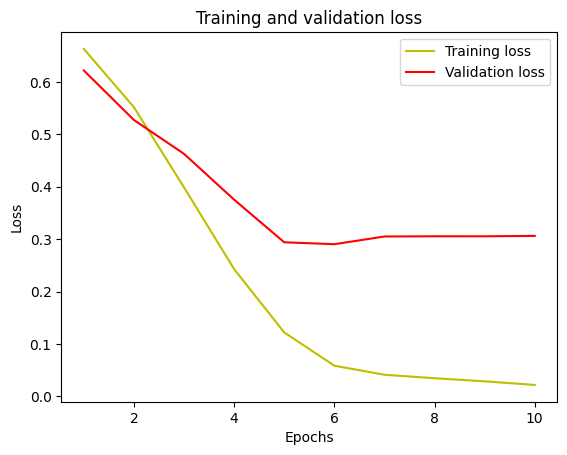

In [58]:

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

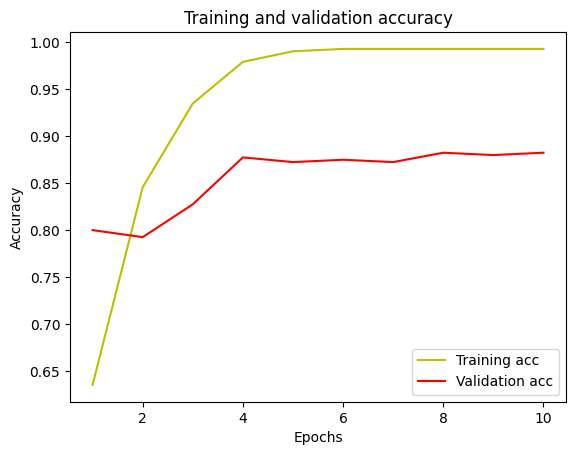

In [59]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()